In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [180]:
import chart_studio
chart_studio.tools.set_credentials_file(username='daniu', api_key='x5Z6naglGsTzLnoMUyoT')

import chart_studio.plotly as py
import plotly.graph_objects as go

In [6]:
df = pd.read_csv('train.csv')

In [10]:
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [12]:
### only choose LA listings
df['city'].value_counts()

NYC        32349
LA         22453
SF          6434
DC          5688
Chicago     3719
Boston      3468
Name: city, dtype: int64

In [14]:
la = df[df['city']=='LA']

In [15]:
### see the NaN in each column
la.isna().sum()

id                           0
log_price                    0
property_type                0
room_type                    0
amenities                    0
accommodates                 0
bathrooms                   66
bed_type                     0
cancellation_policy          0
cleaning_fee                 0
city                         0
description                  0
first_review              5052
host_has_profile_pic         9
host_identity_verified       9
host_response_rate        4043
host_since                   9
instant_bookable             0
last_review               5041
latitude                     0
longitude                    0
name                         0
neighbourhood             5406
number_of_reviews            0
review_scores_rating      5267
thumbnail_url             3399
zipcode                    295
bedrooms                    27
beds                        42
dtype: int64

<Figure size 1080x1440 with 0 Axes>

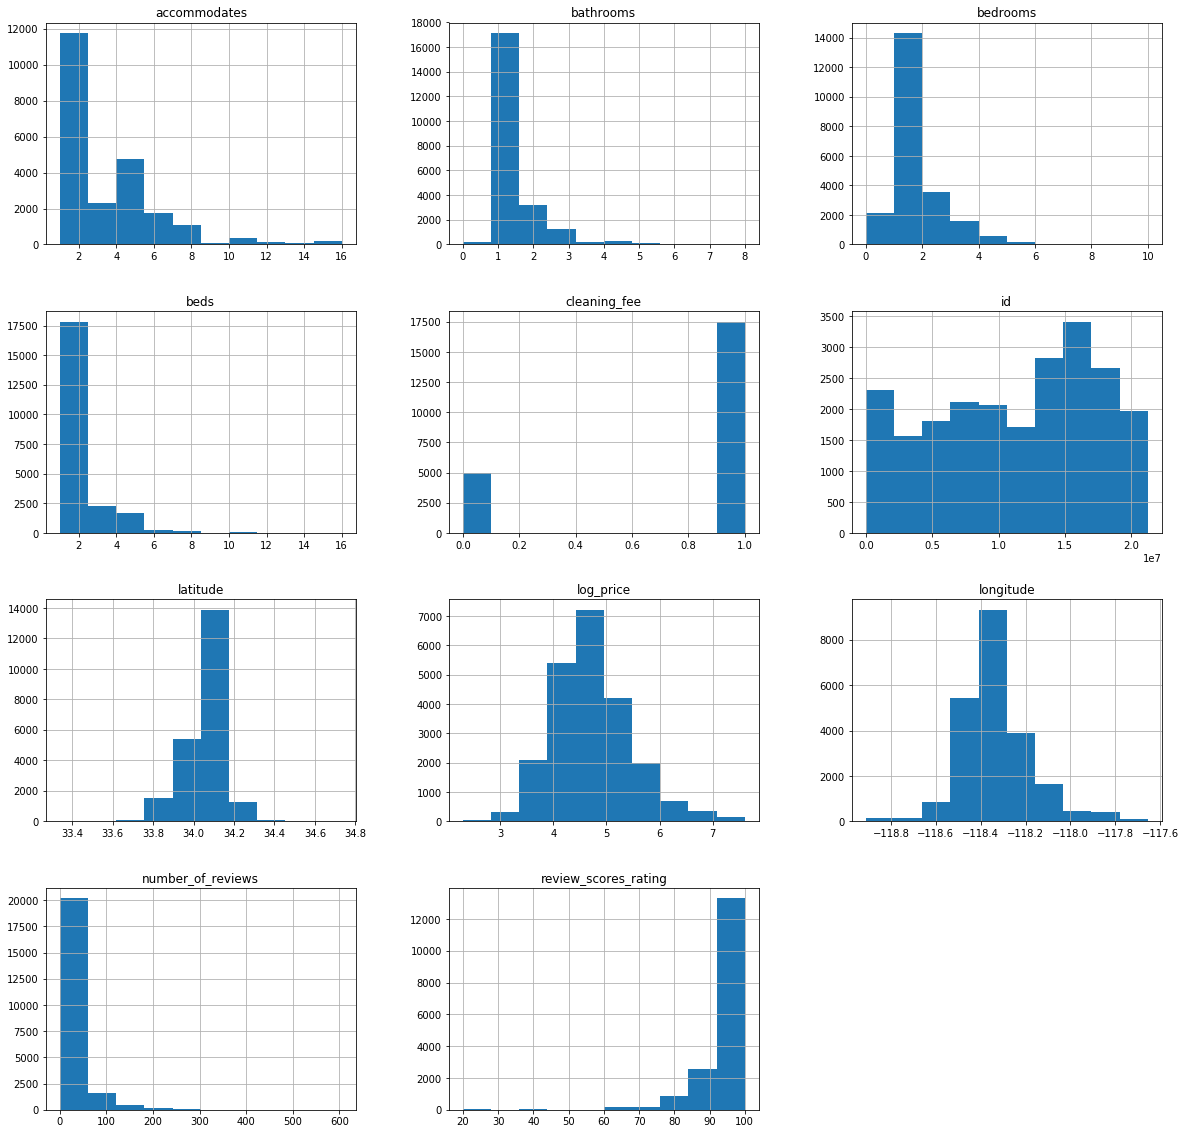

In [20]:
### take a overall look at the data
la.hist(figsize=(20,20))
plt.show()

In [26]:
### drop some columns that are unuseful to predict log_price
df1 = la.drop(['first_review','last_review','thumbnail_url'],axis=1)

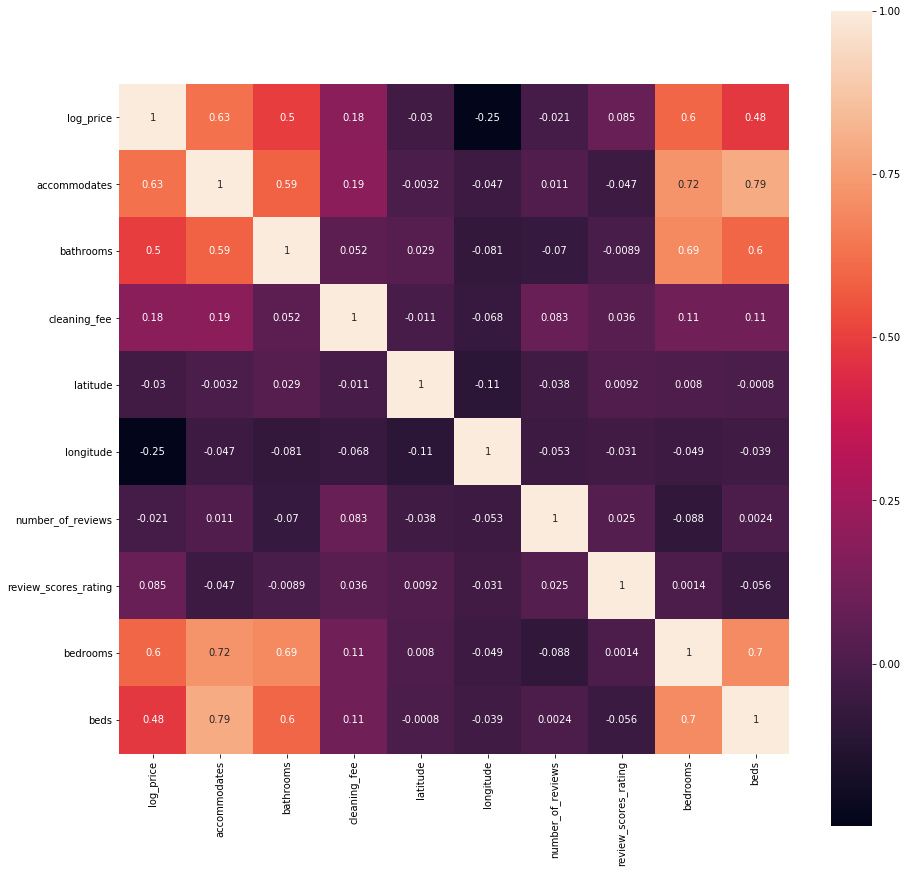

In [31]:
### make a correlation heatmapof data
dfData = df1.drop('id',axis=1).corr()
plt.subplots(figsize=(15, 15)) # 设置画面大小
sns.heatmap(dfData, annot=True, vmax=1, square=True)
plt.show()

In [122]:
### use zipcode to fill NA in neighbourhoods
df2 = df1.dropna()
df2.reset_index(inplace=True)

In [115]:
df2.to_excel('la.xlsx',index=False)

In [33]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11692 entries, 7 to 74110
Data columns (total 26 columns):
id                        11692 non-null int64
log_price                 11692 non-null float64
property_type             11692 non-null object
room_type                 11692 non-null object
amenities                 11692 non-null object
accommodates              11692 non-null int64
bathrooms                 11692 non-null float64
bed_type                  11692 non-null object
cancellation_policy       11692 non-null object
cleaning_fee              11692 non-null bool
city                      11692 non-null object
description               11692 non-null object
host_has_profile_pic      11692 non-null object
host_identity_verified    11692 non-null object
host_response_rate        11692 non-null object
host_since                11692 non-null object
instant_bookable          11692 non-null object
latitude                  11692 non-null float64
longitude                 11

In [34]:
df2.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,1.169200e+04,11692.000000,11692.000000,11692.000000,11692.000000,11692.000000,11692.000000,11692.000000,11692.000000,11692.000000
mean,1.126470e+07,4.754824,3.591173,1.348572,34.053313,-118.348477,32.838522,94.548495,1.331765,1.947742
std,6.089096e+06,0.694949,2.428021,0.728593,0.091968,0.123969,45.134677,6.915027,0.966467,1.511088
min,2.515000e+03,2.484907,1.000000,0.000000,33.705835,-118.911026,1.000000,20.000000,0.000000,1.000000
25%,6.215440e+06,4.317488,2.000000,1.000000,34.011396,-118.435320,5.000000,93.000000,1.000000,1.000000
50%,1.225893e+07,4.691348,3.000000,1.000000,34.067617,-118.352563,16.000000,96.000000,1.000000,1.000000
75%,1.639127e+07,5.164786,4.000000,1.500000,34.103357,-118.278843,42.000000,99.000000,2.000000,2.000000
max,2.123090e+07,7.598399,16.000000,8.000000,34.324635,-117.841303,532.000000,100.000000,10.000000,16.000000


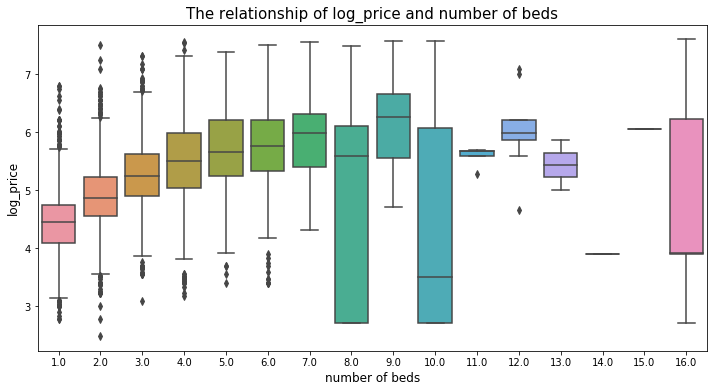

In [99]:
plt.figure(figsize=(12,6))
sns.boxplot(y = 'log_price',x='beds',data=df2)
plt.xlabel('number of beds',fontsize=12)
plt.ylabel('log_price',fontsize=12)
plt.title('The relationship of log_price and number of beds',fontsize=15)
plt.show()

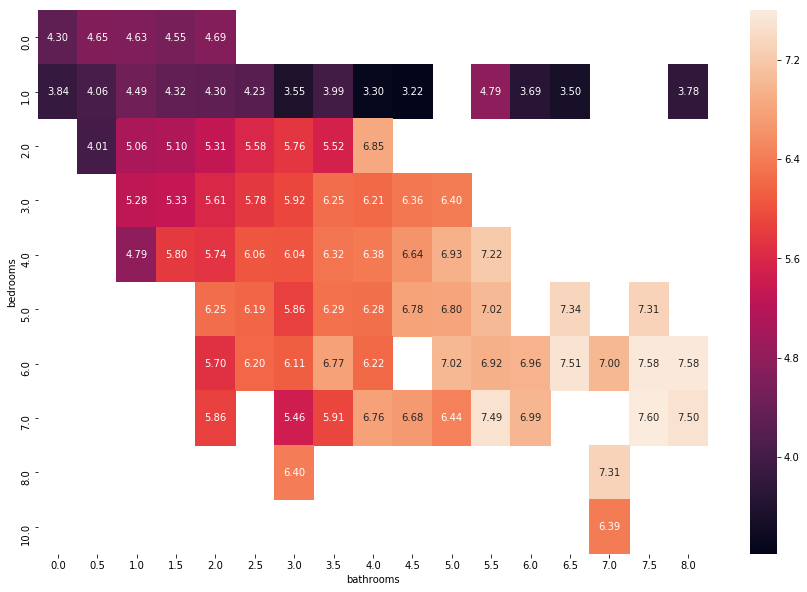

In [48]:
plt.figure(figsize=(15,10))
sns.heatmap(df2.groupby(['bedrooms', 'bathrooms'])['log_price'].mean().unstack(), annot=True, fmt=".2f")
plt.show()

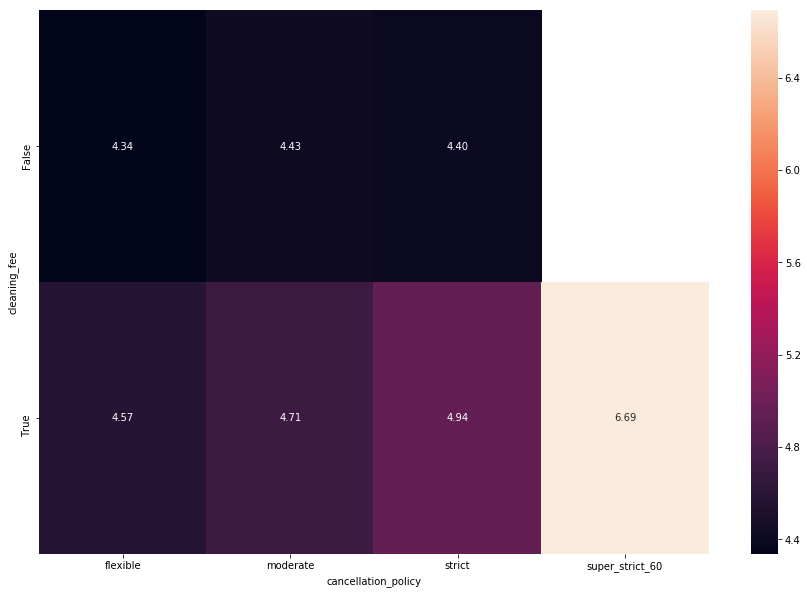

In [111]:
plt.figure(figsize=(15,10))
sns.heatmap(df2.groupby(['cleaning_fee', 'cancellation_policy'])['log_price'].mean().unstack(), annot=True, fmt=".2f")
plt.show()

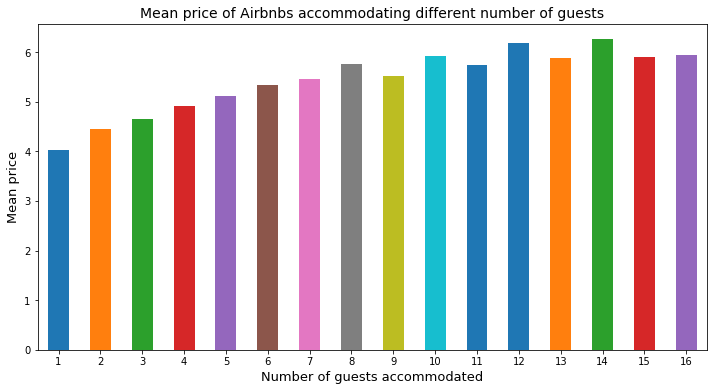

In [196]:
plt.figure(figsize=(12,6))
df2.groupby('accommodates')['log_price'].mean().plot(kind='bar')
plt.title('Mean price of Airbnbs accommodating different number of guests', fontsize=14)
plt.xlabel('Number of guests accommodated', fontsize=13)
plt.ylabel('Mean price', fontsize=13)
plt.xticks(rotation=0)
#plt.xlim(left=0.5)
plt.show()

In [86]:
### top 10 neighbourhood with most listings
df2['neighbourhood'].value_counts()[:10]

Mid-Wilshire       944
Hollywood          934
Venice             926
West Hollywood     504
Santa Monica       394
Long Beach         392
Hollywood Hills    330
Silver Lake        324
Echo Park          284
Downtown           284
Name: neighbourhood, dtype: int64

In [80]:
df2['property_type'].value_counts()[:10]

Apartment          5083
House              4739
Condominium         303
Townhouse           288
Guesthouse          283
Loft                241
Bungalow            220
Other               132
Bed & Breakfast     128
Villa                65
Name: property_type, dtype: int64

In [87]:
neighbour10 = df2['neighbourhood'].value_counts()[:10].index
property2 = df2['property_type'].value_counts()[:2].index
dfnei = df2[(df2['neighbourhood'].isin(neighbour10)) & (df2['property_type'].isin(property2))]

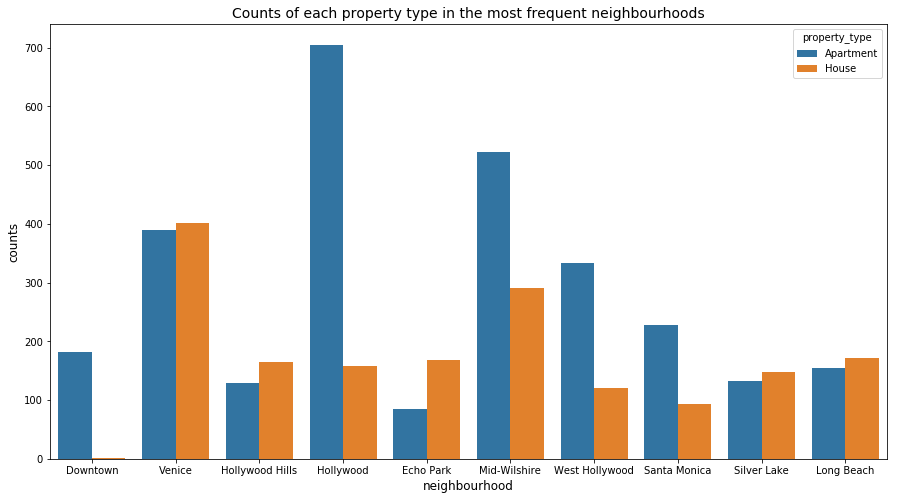

In [199]:
plt.figure(figsize=(15,8))
sns.countplot(x='neighbourhood',hue='property_type',data=dfnei)
plt.xlabel('neighbourhood',fontsize=12)
plt.ylabel('counts',fontsize=12)
plt.title('Counts of each property type in the most frequent neighbourhoods',fontsize=14)
plt.show()

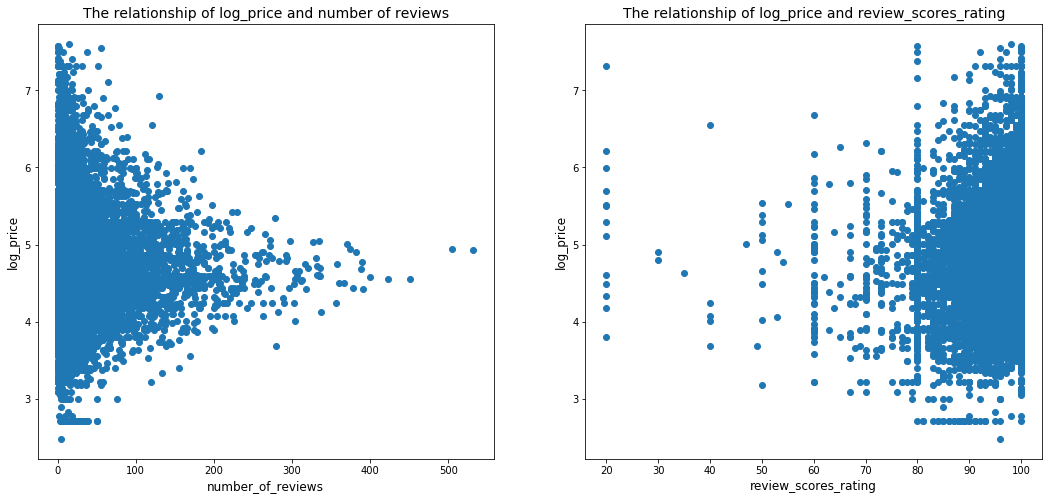

In [202]:
plt.figure(figsize=(18,8))
plt.subplot(121)
plt.scatter(x='number_of_reviews',y='log_price',data=df2)
plt.xlabel('number_of_reviews',fontsize=12)
plt.ylabel('log_price',fontsize=12)
plt.title('The relationship of log_price and number of reviews',fontsize=14)
plt.subplot(122)
plt.scatter(x='review_scores_rating',y='log_price',data=df2)
plt.xlabel('review_scores_rating',fontsize=12)
plt.ylabel('log_price',fontsize=12)
plt.title('The relationship of log_price and review_scores_rating',fontsize=14)
plt.show()

In [140]:
# Importing the LA neighbourhood boundary GeoJSON file as a dataframe in geopandas
import geopandas as gpd
map_df = gpd.read_file('la_neighbour.geojson')
map_df.head()

,kind,external_id,name,slug,set,metadata,resource_uri,geometry
0,L.A. County Neighborhood (Current),acton,Acton,acton-la-county-neighborhood-current,/1.0/boundary-set/la-county-neighborhoods-curr...,"{'sqmi': 39.339109, 'type': 'unincorporated-ar...",/1.0/boundary/acton-la-county-neighborhood-cur...,(POLYGON ((-118.2026174792054 34.5389897207692...
1,L.A. County Neighborhood (Current),adams-normandie,Adams-Normandie,adams-normandie-la-county-neighborhood-current,/1.0/boundary-set/la-county-neighborhoods-curr...,"{'sqmi': 0.80535, 'type': 'segment-of-a-city',...",/1.0/boundary/adams-normandie-la-county-neighb...,(POLYGON ((-118.3090080000001 34.0374109991240...
2,L.A. County Neighborhood (Current),agoura-hills,Agoura Hills,agoura-hills-la-county-neighborhood-current,/1.0/boundary-set/la-county-neighborhoods-curr...,"{'sqmi': 8.14676, 'type': 'standalone-city', '...",/1.0/boundary/agoura-hills-la-county-neighborh...,(POLYGON ((-118.7619250000001 34.1682029991226...
3,L.A. County Neighborhood (Current),agua-dulce,Agua Dulce,agua-dulce-la-county-neighborhood-current,/1.0/boundary-set/la-county-neighborhoods-curr...,"{'sqmi': 31.462632, 'type': 'unincorporated-ar...",/1.0/boundary/agua-dulce-la-county-neighborhoo...,(POLYGON ((-118.2546773959221 34.5583040337505...
4,L.A. County Neighborhood (Current),alhambra,Alhambra,alhambra-la-county-neighborhood-current,/1.0/boundary-set/la-county-neighborhoods-curr...,"{'sqmi': 7.623814, 'type': 'standalone-city', ...",/1.0/boundary/alhambra-la-county-neighborhood-...,(POLYGON ((-118.1217470000002 34.1050399991233...


In [171]:
# Dropping the unuseful columns
la_map = map_df[['name','geometry']]

# Creating a dataframe of listing counts and mean price by neighbourhood
borough_df = pd.DataFrame(df2.groupby('neighbourhood').size())
borough_df.rename(columns={0: 'number_of_listings'}, inplace=True)
borough_df['mean_price'] = df2.groupby('neighbourhood')['log_price'].mean().values

# Joining the dataframes
borough_map_df = la_map.set_index('name').join(borough_df)

In [172]:
borough_map_df.dropna(inplace=True)

borough_map_df.head()

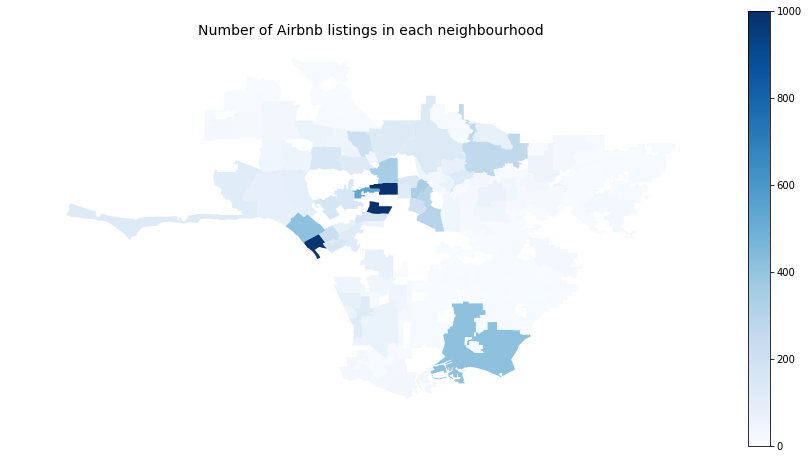

In [175]:
# Plotting the number of listings in each neighbourhood
fig1, ax1 = plt.subplots(1, figsize=(15, 8))
borough_map_df.plot(column='number_of_listings', cmap='Blues', ax=ax1)
ax1.axis('off')
ax1.set_title('Number of Airbnb listings in each neighbourhood', fontsize=14)
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=1000))
sm._A = [] # Creates an empty array for the data range
cbar = fig1.colorbar(sm)
plt.show()

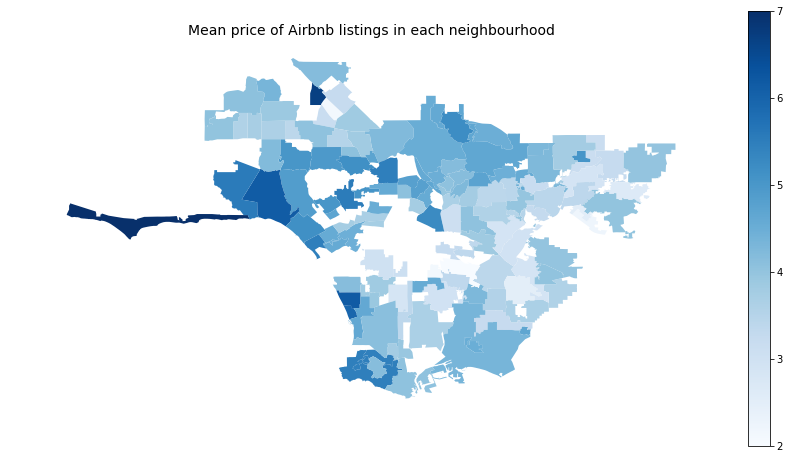

In [176]:
# Plotting the median price of listings in each borough
fig2, ax2 = plt.subplots(1, figsize=(15, 8))
borough_map_df.plot(column='mean_price', cmap='Blues', ax=ax2)
ax2.axis('off')
ax2.set_title('Mean price of Airbnb listings in each neighbourhood', fontsize=14)
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=2, vmax=7))
sm._A = [] # Creates an empty array for the data range
cbar = fig2.colorbar(sm)
plt.show()

In [118]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [130]:
df2['clean_amen'] = df2['amenities'].apply(lambda x: x.replace('\"',''))

In [136]:
text = " ".join(review for review in df2['clean_amen'])
print ("There are {} words in the combination of all review.".format(len(text)))

There are 3217741 words in the combination of all review.


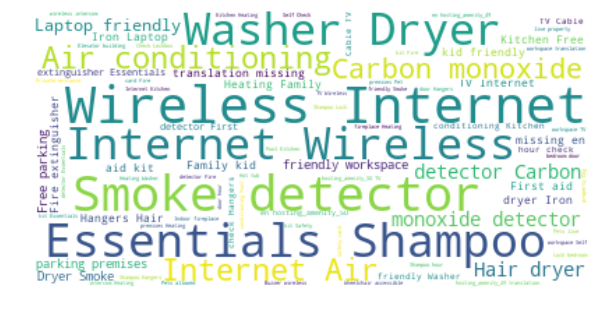

In [139]:
# Create stopword list:
stopwords = set(STOPWORDS)
#stopwords.update(["drink", "now", "wine", "flavor", "flavors"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()